# **Face Landmarks Detection & Snap Chat Filter with Mediapipe and OpenCV**

In [1]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt


In [2]:
# Initialize the mediapipe face detection class.
mp_face_detection = mp.solutions.face_detection

# Setup the face detection function.
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

# Initialize the mediapipe drawing class.
mp_drawing = mp.solutions.drawing_utils

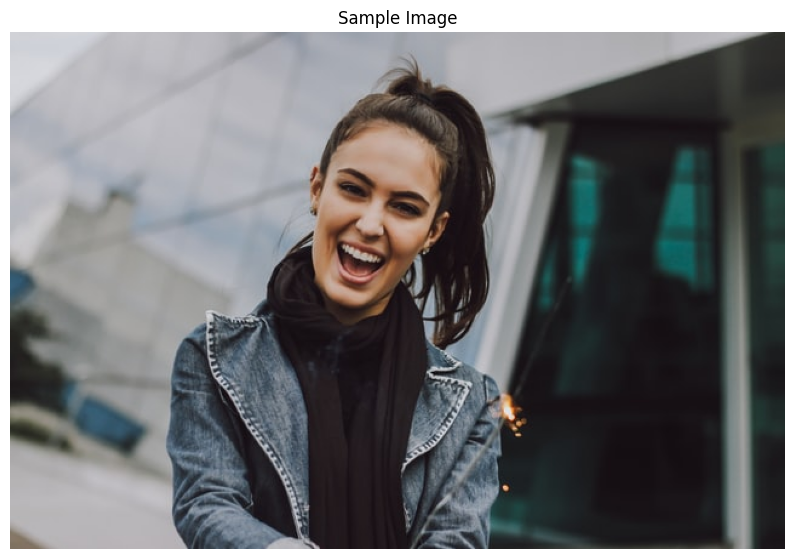

In [3]:
# Read an image from the specified path.
sample_img = cv2.imread('Sample.jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display.
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [4]:
# Perform face detection after converting the image into RGB format.
face_detection_results = face_detection.process(sample_img[:,:,::-1])

# Check if the face(s) in the image are found.
if face_detection_results.detections:

    # Iterate over the found faces.
    for face_no, face in enumerate(face_detection_results.detections):

        # Display the face number upon which we are iterating upon.
        print(f'FACE NUMBER: {face_no+1}')
        print('---------------------------------')

        # Display the face confidence.
        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')

        # Get the face bounding box and face key points coordinates.
        face_data = face.location_data

        # Display the face bounding box coordinates.
        print(f'\nFACE BOUNDING BOX:\n{face_data.relative_bounding_box}')

        # Iterate two times as we only want to display first two key points of each detected face.
        for i in range(2):

            # Display the found normalized key points.
            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}')

FACE NUMBER: 1
---------------------------------
FACE CONFIDENCE: 0.98

FACE BOUNDING BOX:
xmin: 0.397023648
ymin: 0.276274681
width: 0.161007315
height: 0.241322756

RIGHT_EYE:
x: 0.436854
y: 0.319858611

LEFT_EYE:
x: 0.511243761
y: 0.356513083



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


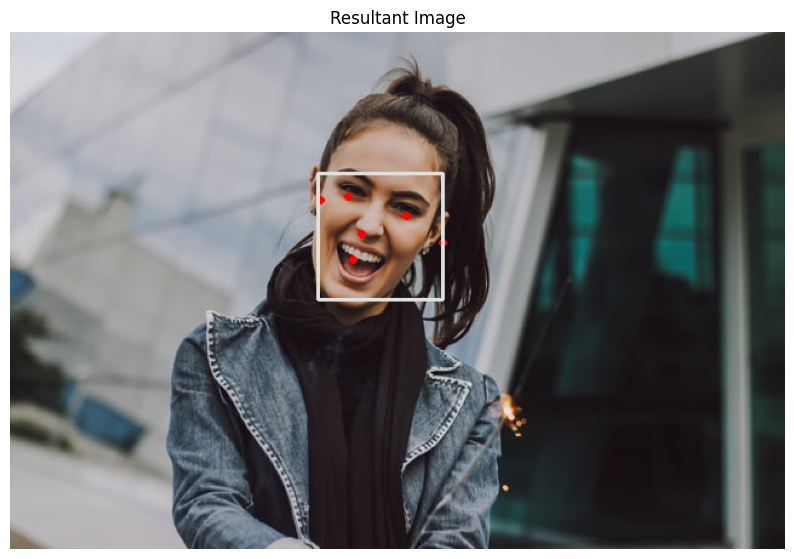

In [5]:
# Create a copy of the sample image to draw the bounding box and key points.
img_copy = sample_img[:,:,::-1].copy()

# Check if the face(s) in the image are found.
if face_detection_results.detections:

    # Iterate over the found faces.
    for face_no, face in enumerate(face_detection_results.detections):

        # Draw the face bounding box and key points on the copy of the sample image.
        mp_drawing.draw_detection(image=img_copy, detection=face,
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))
# Specify a size of the figure.
fig = plt.figure(figsize = [10, 10])

# Display the resultant image with the bounding box and key points drawn,
# also convert BGR to RGB for display.
plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

In [6]:
# Initialize the mediapipe face mesh class.
mp_face_mesh = mp.solutions.face_mesh

# Setup the face landmarks function for images.
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

# Setup the face landmarks function for videos.
face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1,
                                         min_detection_confidence=0.5,min_tracking_confidence=0.3)

# Initialize the mediapipe drawing styles class.
mp_drawing_styles = mp.solutions.drawing_styles

In [7]:
# Perform face landmarks detection after converting the image into RGB format.
face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

# Get the list of indexes of the left and right eye.
LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

# Check if facial landmarks are found.
if face_mesh_results.multi_face_landmarks:

    # Iterate over the found faces.
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):

        # Display the face number upon which we are iterating upon.
        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')

        # Display the face part name i.e., left eye whose landmarks we are gonna display.
        print(f'LEFT EYE LANDMARKS:\n')

        # Iterate over the first two landmarks indexes of the left eye.
        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:

            # Display the found normalized landmarks of the left eye.
            print(face_landmarks.landmark[LEFT_EYE_INDEX])

        # Display the face part name i.e., right eye whose landmarks we are gonna display.
        print(f'RIGHT EYE LANDMARKS:\n')

        # Iterate over the first two landmarks indexes of the right eye.
        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:

            # Display the found normalized landmarks of the right eye.
            print(face_landmarks.landmark[RIGHT_EYE_INDEX])

FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:

x: 0.499762237
y: 0.334038764
z: -0.00355119514

x: 0.505622387
y: 0.334654778
z: -0.00525352452

RIGHT EYE LANDMARKS:

x: 0.438392818
y: 0.299862206
z: -0.00149297062

x: 0.430432349
y: 0.300330281
z: 0.00607694592



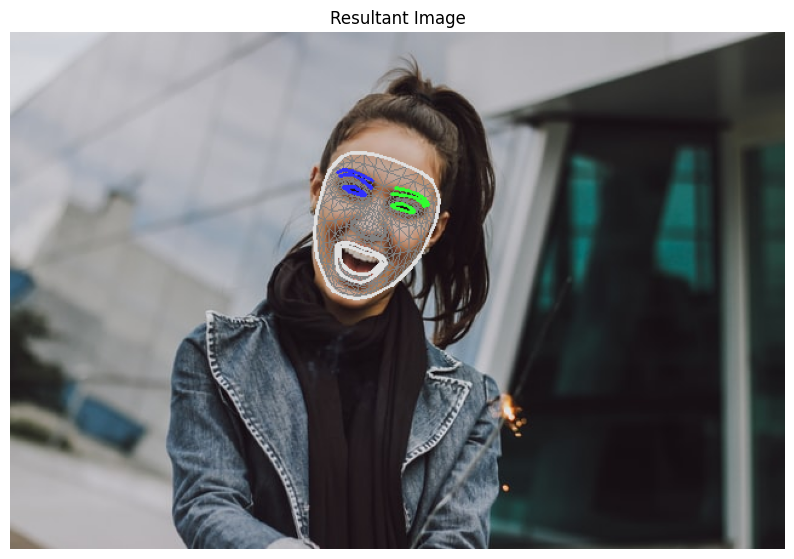

In [8]:
# Create a copy of the sample image in RGB format to draw the found facial landmarks on.
img_copy = sample_img[:,:,::-1].copy()

# Check if facial landmarks are found.
if face_mesh_results.multi_face_landmarks:

    # Iterate over the found faces.
    for face_landmarks in face_mesh_results.multi_face_landmarks:

        # Draw the facial landmarks on the copy of the sample image with the
        # face mesh tesselation connections using default face mesh tesselation style.
        mp_drawing.draw_landmarks(image=img_copy,
                                  landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None,
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

        # Draw the facial landmarks on the copy of the sample image with the
        # face mesh contours connections using default face mesh contours style.
        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=None,
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

# Specify a size of the figure.
fig = plt.figure(figsize = [10, 10])

# Display the resultant image with the face mesh drawn.
plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

In [3]:
def detectFacialLandmarks(image, face_mesh, display = True):
    '''
    This function performs facial landmarks detection on an image.
    Args:
        image:     The input image of person(s) whose facial landmarks needs to be detected.
        face_mesh: The face landmarks detection function required to perform the landmarks detection.
        display:   A boolean value that is if set to true the function displays the original input image,
                   and the output image with the face landmarks drawn and returns nothing.
    Returns:
        output_image: A copy of input image with face landmarks drawn.
        results:      The output of the facial landmarks detection on the input image.
    '''

    # Perform the facial landmarks detection on the image, after converting it into RGB format.
    results = face_mesh.process(image[:,:,::-1])

    # Create a copy of the input image to draw facial landmarks.
    output_image = image[:,:,::-1].copy()

    # Check if facial landmarks in the image are found.
    if results.multi_face_landmarks:

        # Iterate over the found faces.
        for face_landmarks in results.multi_face_landmarks:

            # Draw the facial landmarks on the output image with the face mesh tesselation
            # connections using default face mesh tesselation style.
            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

            # Draw the facial landmarks on the output image with the face mesh contours
            # connections using default face mesh contours style.
            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

    # Check if the original input image and the output image are specified to be displayed.
    if display:

        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image);plt.title("Output");plt.axis('off');

    # Otherwise
    else:

        # Return the output image in BGR format and results of facial landmarks detection.
        return np.ascontiguousarray(output_image[:,:,::-1], dtype=np.uint8), results

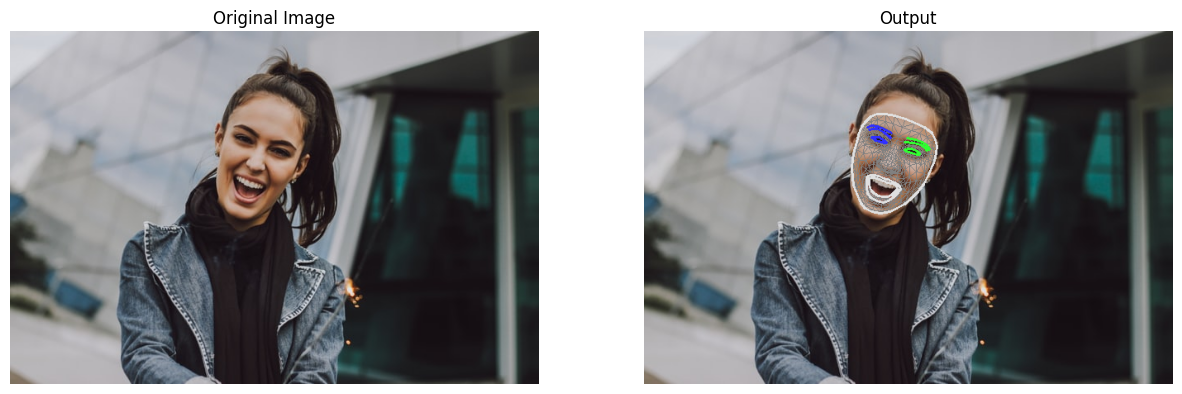

In [10]:
# Read a sample image and perform facial landmarks detection on it.
image = cv2.imread('Sample.jpg')
detectFacialLandmarks(image, face_mesh_images, display=True)

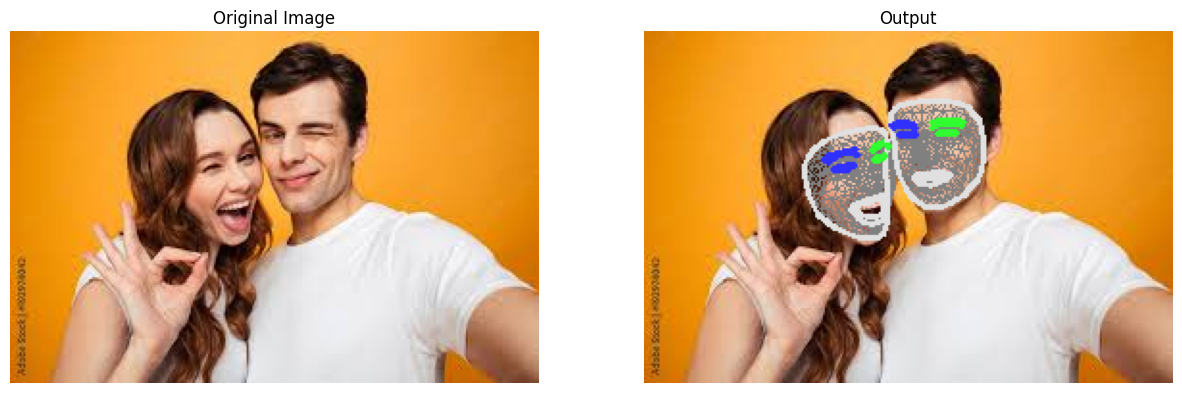

In [11]:
# Read another sample image and perform facial landmarks detection on it.
image = cv2.imread('image.jfif')
detectFacialLandmarks(image, face_mesh_images, display=True)

In [12]:
# Initialize the VideoCapture object to read from the webcam.
import cv2
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Create named window for resizing purposes.
cv2.namedWindow('Face Landmarks Detection', cv2.WINDOW_NORMAL)

# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():

    # Read a frame.
    ok, frame = camera_video.read()

    # Check if frame is not read properly then continue to the next iteration to
    # read the next frame.
    if not ok:
        continue

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)

    # Perform Face landmarks detection.
    frame, _ = detectFacialLandmarks(frame, face_mesh_videos, display=False)

    # Set the time for this frame to the current time.
    time2 = time()

    # Check if the difference between the previous and this frame time > 0 to avoid
    # division by zero.
    if (time2 - time1) > 0:

        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)

        # Write the calculated number of frames per second on the frame.
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),
                    cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2

    # Display the frame.
    cv2.imshow('Face Landmarks Detection', frame)

    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF

    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()

In [4]:
def getSize(image, face_landmarks, INDEXES):
    '''
    This function calculate the height and width of a face part utilizing its landmarks.
    Args:
        image:          The image of person(s) whose face part size is to be calculated.
        face_landmarks: The detected face landmarks of the person whose face part size is to 
                        be calculated.
        INDEXES:        The indexes of the face part landmarks, whose size is to be calculated.
    Returns:
        width:     The calculated width of the face part of the face whose landmarks were passed.
        height:    The calculated height of the face part of the face whose landmarks were passed.
        landmarks: An array of landmarks of the face part whose size is calculated.
    '''
    
    # Retrieve the height and width of the image.
    image_height, image_width, _ = image.shape
    
    # Convert the indexes of the landmarks of the face part into a list.
    INDEXES_LIST = list(itertools.chain(*INDEXES))
    
    # Initialize a list to store the landmarks of the face part.
    landmarks = []
    
    # Iterate over the indexes of the landmarks of the face part. 
    for INDEX in INDEXES_LIST:
        
        # Append the landmark into the list.
        landmarks.append([int(face_landmarks.landmark[INDEX].x * image_width),
                               int(face_landmarks.landmark[INDEX].y * image_height)])
    
    # Calculate the width and height of the face part.
    _, _, width, height = cv2.boundingRect(np.array(landmarks))
    
    # Convert the list of landmarks of the face part into a numpy array.
    landmarks = np.array(landmarks)
    
    # Retrurn the calculated width height and the landmarks of the face part.
    return width, height, landmarks

In [5]:
def isOpen(image, face_mesh_results, face_part, threshold=0.5, display=True):
    '''
    This function checks whether the an eye or mouth of the person(s) is open, 
    utilizing its facial landmarks.
    Args:
        image:             The image of person(s) whose an eye or mouth is to be checked.
        face_mesh_results: The output of the facial landmarks detection on the image.
        face_part:         The name of the face part that is required to check.
        threshold:         The threshold value used to check the isOpen condition.
        display:           A boolean value that is if set to true the function displays 
                           the output image and returns nothing.
    Returns:
        output_image: The image of the person with the face part is opened  or not status written.
        status:       A dictionary containing isOpen statuses of the face part of all the 
                      detected faces.  
    '''
    
    # Retrieve the height and width of the image.
    image_height, image_width, _ = image.shape
    
    # Create a copy of the input image to write the isOpen status.
    output_image = image.copy()
    
    # Create a dictionary to store the isOpen status of the face part of all the detected faces.
    status={}
    
    # Check if the face part is mouth.
    if face_part == 'MOUTH':
        
        # Get the indexes of the mouth.
        INDEXES = mp_face_mesh.FACEMESH_LIPS
        
        # Specify the location to write the is mouth open status.
        loc = (10, image_height - image_height//40)
        
        # Initialize a increment that will be added to the status writing location, 
        # so that the statuses of two faces donot overlap. 
        increment=-30
        
    # Check if the face part is left eye.    
    elif face_part == 'LEFT EYE':
        
        # Get the indexes of the left eye.
        INDEXES = mp_face_mesh.FACEMESH_LEFT_EYE
        
        # Specify the location to write the is left eye open status.
        loc = (10, 30)
        
        # Initialize a increment that will be added to the status writing location, 
        # so that the statuses of two faces donot overlap.
        increment=30
    
    # Check if the face part is right eye.    
    elif face_part == 'RIGHT EYE':
        
        # Get the indexes of the right eye.
        INDEXES = mp_face_mesh.FACEMESH_RIGHT_EYE 
        
        # Specify the location to write the is right eye open status.
        loc = (image_width-300, 30)
        
        # Initialize a increment that will be added to the status writing location, 
        # so that the statuses of two faces donot overlap.
        increment=30
    
    # Otherwise return nothing.
    else:
        return
    
    # Iterate over the found faces.
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):
        
         # Get the height of the face part.
        _, height, _ = getSize(image, face_landmarks, INDEXES)
        
         # Get the height of the whole face.
        _, face_height, _ = getSize(image, face_landmarks, mp_face_mesh.FACEMESH_FACE_OVAL)
        
        # Check if the face part is open.
        if (height/face_height)*100 > threshold:
            
            # Set status of the face part to open.
            status[face_no] = 'OPEN'
            
            # Set color which will be used to write the status to green.
            color=(0,255,0)
        
        # Otherwise.
        else:
            # Set status of the face part to close.
            status[face_no] = 'CLOSE'
            
            # Set color which will be used to write the status to red.
            color=(0,0,255)
        
        # Write the face part isOpen status on the output image at the appropriate location.
        cv2.putText(output_image, f'FACE {face_no+1} {face_part} {status[face_no]}.', 
                    (loc[0],loc[1]+(face_no*increment)), cv2.FONT_HERSHEY_PLAIN, 1.4, color, 2)
                
    # Check if the output image is specified to be displayed.
    if display:

        # Display the output image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    
    # Otherwise
    else:
        
        # Return the output image and the isOpen statuses of the face part of each detected face.
        return output_image, status

: 

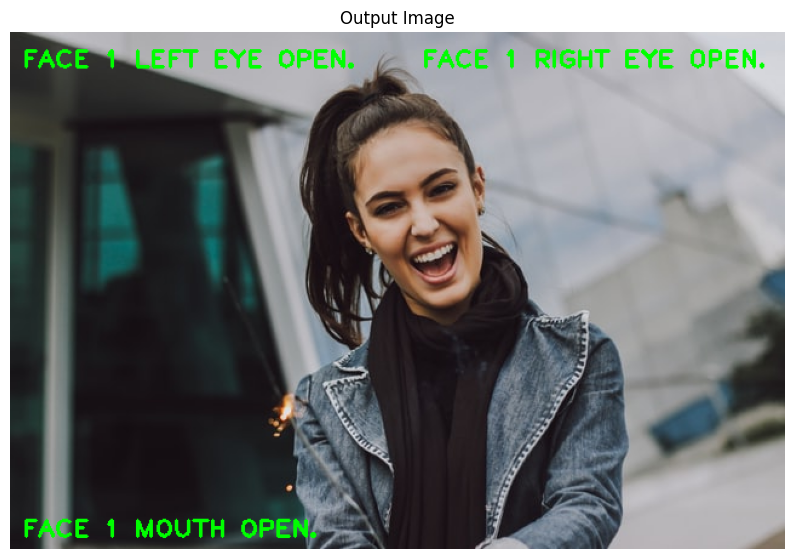

In [15]:
# Read another sample image and perform facial expression recognition on it.
image = cv2.imread('Sample.jpg')
image = cv2.flip(image, 1)
_, face_mesh_results = detectFacialLandmarks(image, face_mesh_images, display=False)
if face_mesh_results.multi_face_landmarks:
    output_image, _ = isOpen(image, face_mesh_results, 'MOUTH', threshold=15, display=False)
    output_image, _ = isOpen(output_image, face_mesh_results, 'LEFT EYE', threshold=5, display=False)
    isOpen(output_image, face_mesh_results, 'RIGHT EYE', threshold=5)

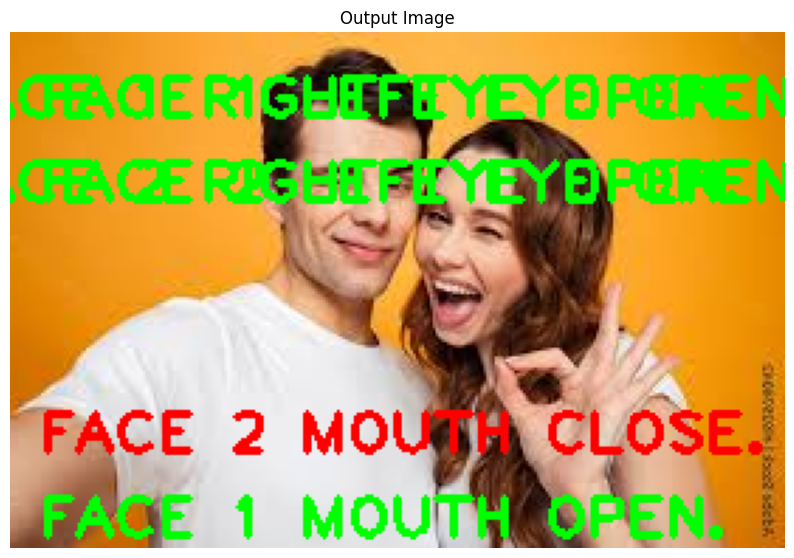

In [16]:
# Read another sample image and perform facial expression recognition on it.
image = cv2.imread('image.jfif')
image = cv2.flip(image, 1)
_, face_mesh_results = detectFacialLandmarks(image, face_mesh_images, display=False)
if face_mesh_results.multi_face_landmarks:
    output_image, _ = isOpen(image, face_mesh_results, 'MOUTH', threshold=15, display=False)
    output_image, _ = isOpen(output_image, face_mesh_results, 'LEFT EYE', threshold=5, display=False)
    isOpen(output_image, face_mesh_results, 'RIGHT EYE', threshold=5)

In [17]:
# Initialize the VideoCapture object to read from the webcam.
import cv2
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Create named window for resizing purposes.
cv2.namedWindow('Face Landmarks Detection', cv2.WINDOW_NORMAL)

# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():

    # Read a frame.
    ok, frame = camera_video.read()

    # Check if frame is not read properly then continue to the next iteration to
    # read the next frame.
    if not ok:
        continue

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)

    # Perform Face landmarks detection.
    
    frame, face_mesh_results = detectFacialLandmarks(frame, face_mesh_videos, display=False)
    if face_mesh_results.multi_face_landmarks:
        frame, _ = isOpen(frame, face_mesh_results, 'MOUTH', threshold=15, display=False)
        frame, _ = isOpen(frame, face_mesh_results, 'LEFT EYE', threshold=3, display=False)
        frame, _ = isOpen(frame, face_mesh_results, 'RIGHT EYE', threshold=3, display=False)
        

    # Set the time for this frame to the current time.
    time2 = time()

    # Check if the difference between the previous and this frame time > 0 to avoid
    # division by zero.
    if (time2 - time1) > 0:

        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)

        # Write the calculated number of frames per second on the frame.
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),
                    cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2

    # Display the frame.
    cv2.imshow('Face Landmarks Detection', frame)

    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF

    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.

cv2.destroyAllWindows()

In [18]:
def overlay(image, filter_img, face_landmarks, face_part, INDEXES, display=True):
    '''
    This function will overlay a filter image over a face part of a person in the image/frame.
    Args:
        image:          The image of a person on which the filter image will be overlayed.
        filter_img:     The filter image that is needed to be overlayed on the image of the person.
        face_landmarks: The facial landmarks of the person in the image.
        face_part:      The name of the face part on which the filter image will be overlayed.
        INDEXES:        The indexes of landmarks of the face part.
        display:        A boolean value that is if set to true the function displays 
                        the annotated image and returns nothing.
    Returns:
        annotated_image: The image with the overlayed filter on the top of the specified face part.
    '''
    
    # Create a copy of the image to overlay filter image on.
    annotated_image = image.copy()
    
    # Errors can come when it resizes the filter image to a too small or a too large size .
    # So use a try block to avoid application crashing.
    try:
    
        # Get the width and height of filter image.
        filter_img_height, filter_img_width, _  = filter_img.shape

        # Get the height of the face part on which we will overlay the filter image.
        _, face_part_height, landmarks = getSize(image, face_landmarks, INDEXES)
        
        # Specify the height to which the filter image is required to be resized.
        required_height = int(face_part_height*2.5)
        
        # Resize the filter image to the required height, while keeping the aspect ratio constant. 
        resized_filter_img = cv2.resize(filter_img, (int(filter_img_width*
                                                         (required_height/filter_img_height)),
                                                     required_height))
        
        # Get the new width and height of filter image.
        filter_img_height, filter_img_width, _  = resized_filter_img.shape

        # Convert the image to grayscale and apply the threshold to get the mask image.
        _, filter_img_mask = cv2.threshold(cv2.cvtColor(resized_filter_img, cv2.COLOR_BGR2GRAY),
                                           25, 255, cv2.THRESH_BINARY_INV)

        # Calculate the center of the face part.
        center = landmarks.mean(axis=0).astype("int")

        # Check if the face part is mouth.
        if face_part == 'MOUTH':

            # Calculate the location where the smoke filter will be placed.  
            location = (int(center[0] - filter_img_width / 3), int(center[1]))

        # Otherwise if the face part is an eye.
        else:

            # Calculate the location where the eye filter image will be placed.  
            location = (int(center[0]-filter_img_width/2), int(center[1]-filter_img_height/2))

        # Retrieve the region of interest from the image where the filter image will be placed.
        ROI = image[location[1]: location[1] + filter_img_height,
                    location[0]: location[0] + filter_img_width]

        # Perform Bitwise-AND operation. This will set the pixel values of the region where,
        # filter image will be placed to zero.
        resultant_image = cv2.bitwise_and(ROI, ROI, mask=filter_img_mask)

        # Add the resultant image and the resized filter image.
        # This will update the pixel values of the resultant image at the indexes where 
        # pixel values are zero, to the pixel values of the filter image.
        resultant_image = cv2.add(resultant_image, resized_filter_img)

        # Update the image's region of interest with resultant image.
        annotated_image[location[1]: location[1] + filter_img_height,
                        location[0]: location[0] + filter_img_width] = resultant_image
            
    # Catch and handle the error(s).
    except Exception as e:
        pass
    
    # Check if the annotated image is specified to be displayed.
    if display:

        # Display the annotated image.
        plt.figure(figsize=[10,10])
        plt.imshow(annotated_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    
    # Otherwise
    else:
            
        # Return the annotated image.
        return annotated_image

In [1]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Create named window for resizing purposes.
cv2.namedWindow('Face Filter', cv2.WINDOW_NORMAL)

# Read the left and right eyes images.
left_eye = cv2.imread('left_eye.png')
right_eye = cv2.imread('right_eye.png')

# Initialize the VideoCapture object to read from the smoke animation video stored in the disk.
smoke_animation = cv2.VideoCapture('smoke_animation.mp4')

# Set the smoke animation video frame counter to zero.
smoke_frame_counter = 0

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly then continue to the next iteration to read
    # the next frame.
    if not ok:
        continue
        
    # Read a frame from smoke animation video
    _, smoke_frame = smoke_animation.read()
    
    # Increment the smoke animation video frame counter.
    smoke_frame_counter += 1
    
    # Check if the current frame is the last frame of the smoke animation video.
    if smoke_frame_counter == smoke_animation.get(cv2.CAP_PROP_FRAME_COUNT):     
        
        # Set the current frame position to first frame to restart the video.
        smoke_animation.set(cv2.CAP_PROP_POS_FRAMES, 0)
        
        # Set the smoke animation video frame counter to zero.
        smoke_frame_counter = 0
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Perform Face landmarks detection.
    _, face_mesh_results = detectFacialLandmarks(frame, face_mesh_videos, display=False)
    
    # Check if facial landmarks are found.
    if face_mesh_results.multi_face_landmarks:
        
        # Get the mouth isOpen status of the person in the frame.
        _, mouth_status = isOpen(frame, face_mesh_results, 'MOUTH', 
                                     threshold=15, display=False)
        
        # Get the left eye isOpen status of the person in the frame.
        _, left_eye_status = isOpen(frame, face_mesh_results, 'LEFT EYE', 
                                        threshold=4.5 , display=False)
        
        # Get the right eye isOpen status of the person in the frame.
        _, right_eye_status = isOpen(frame, face_mesh_results, 'RIGHT EYE', 
                                         threshold=4.5, display=False)
        
        # Iterate over the found faces.
        for face_num, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):
            
            # Check if the left eye of the face is open.
            if left_eye_status[face_num] == 'OPEN':
                
                # Overlay the left eye image on the frame at the appropriate location.
                frame = overlay(frame, left_eye, face_landmarks,
                                'LEFT EYE', mp_face_mesh.FACEMESH_LEFT_EYE, display=False)
            
            # Check if the right eye of the face is open.
            if right_eye_status[face_num] == 'OPEN':
                
            #     # Overlay the right eye image on the frame at the appropriate location.
                frame = overlay(frame, right_eye, face_landmarks,
                                'RIGHT EYE', mp_face_mesh.FACEMESH_RIGHT_EYE, display=False)
            
            # Check if the mouth of the face is open.
            if mouth_status[face_num] == 'OPEN':
                
                # Overlay the smoke animation on the frame at the appropriate location.
                frame = overlay(frame, smoke_frame, face_landmarks, 
                                'MOUTH', mp_face_mesh.FACEMESH_LIPS, display=False)
    
    # Display the frame.
    cv2.imshow('Face Filter', frame)
    
    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF    
    
    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.                  
camera_video.release()
cv2.destroyAllWindows()

NameError: name 'detectFacialLandmarks' is not defined